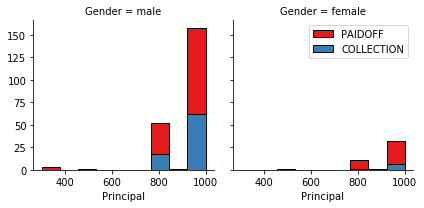

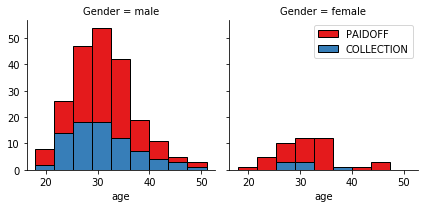

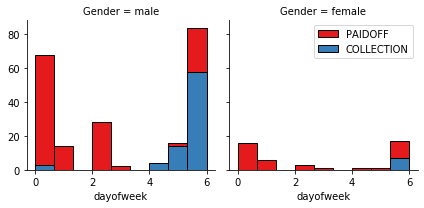

K NEAREST NEIGHBOR(KNN) ALGORITHM

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
Train set Accuracy:  0.8152173913043478
Test set Accuracy:  0.6857142857142857


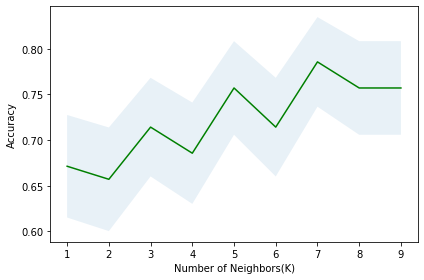

The best accuracy was with 0.7857142857142857 with k= 7

DECISION TREES ALGORITHM

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']
Decision Trees's Accuracy:  0.6538461538461539

SUPPORT VECTOR MACHINE ALGORITHM

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Accuracy for SVM:  0.7571428571428571

LOGISTIC REGRESSION ALGORITHM

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Accuracy for Logistic Regression:  0.7571428571428571
K Nearest Neighbor(KNN):-
	Accuracy using Jaccard: 0.6857142857142857
	Accuracy using F1-score: 0.6670522459996144
Decision Tree:-
	Accuracy using Jaccard: 0.6538461538461539
	Accuracy using F1-score: 0.6666949930317142
Support Vector

C:\Users\ashit\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


,Jacard,F1-score,Log-Loss
KNN,0.685714,0.667052,Null
Decision Tree,0.653846,0.666695,Null
SVM,0.757143,0.746875,Null
Logistic Regression,0.685714,0.667052,0.577229


In [47]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Loading Data From CSV File
df = pd.read_csv('loan_train.csv')
df.head()

df.shape

# Convert to date time object
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

# Data visualization and pre-processing
df['loan_status'].value_counts()

import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing: Feature selection/extraction
# Lets look at the day of the week people get the loan
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

# We see that people who get the loan at the end of the week dont pay it off
# So lets use Feature binarization to set a threshold values less then day 4
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

# Convert Categorical features to numerical values
# Lets look at gender:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

# 86 % of female pay there loans while only 73 % of males pay there loan
# Lets convert male to 0 and female to 1:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

# One Hot Encoding technique tyo convert values to binary
# Lets group education and loan_status to check on it
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

df[['Principal','terms','age','Gender','education']].head()

# Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

# Feature selection
# Lets defind feature sets, X:
X = Feature
X[0:5]

y = df['loan_status'].values
y[0:5]

# Normalize data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

"Now we make use of different Classification techniques to find the accuracy of the model"

"K Nearest Neighbor(KNN)"

print("K NEAREST NEIGHBOR(KNN) ALGORITHM\n")
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#importing neighbors classifier
from sklearn.neighbors import KNeighborsClassifier as knc

#starting the algortihm with k=4 for now
k = 4

#Train Model and Predict 
neigh = knc(n_neighbors = k).fit(X_train,y_train)
neigh

#using model to predict test set
yhat = neigh.predict(X_test)
yhat[0:5]

#finding accuracy for train and test set
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMatrix = [];

for n in range (1,Ks):
    
    #Train Model and Predict  
    neigh = knc(n_neighbors = n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat == y_test)/np.sqrt(yhat.shape[0])
mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc-1 * std_acc, mean_acc+1 * std_acc, alpha=0.10)
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors(K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

"Decision Tree Classifier"

print("\nDECISION TREES ALGORITHM\n")
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:",X_test.shape, y_test.shape)

# Creating a decision tree for loan dataset
loanTree = dtc(criterion="entropy", max_depth = 4)
loanTree

loanTree.fit(X_trainset,y_trainset)

# Let's make some predictions on the testing dataset and store it into a variable called predTree
predTree = loanTree.predict(X_testset)

print (predTree [0:5])
print (y_testset [0:5])

# Finding accuracy
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

"Support Vector Machine Classifier"

print("\nSUPPORT VECTOR MACHINE ALGORITHM\n")
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Modelling with svm and scikit learn
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

yhat = clf.predict(X_test)
yhat [0:5]

print (yhat [0:5])
print (y_test [0:5])

from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy for SVM: ", metrics.accuracy_score(y_test, y_hat))

"Logistic Regression"

print("\nLOGISTIC REGRESSION ALGORITHM\n")
from sklearn.model_selection import train_test_split
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_set.shape,  y_train_set.shape)
print ('Test set:', X_test_set.shape,  y_test_set.shape)

# Modeling (Logistic Regression with Scikit-learn)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

yhat = LR.predict(X_test_set)
yhat[0:5]

yhat_prob = LR.predict_proba(X_test_set)
yhat_prob[0:5]

print (yhat [0:5])
print (y_test_set [0:5])

from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy for Logistic Regression: ", metrics.accuracy_score(y_test, y_hat))

"Model Evaluation using Test set"
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

test_df = pd.read_csv('loan_test.csv')
test_df.head()

knj = jaccard_similarity_score(y_test, yhat)
kf1 = f1_score(y_test, yhat, average='weighted')
print("K Nearest Neighbor(KNN):-")
print("\tAccuracy using Jaccard:",knj)
print("\tAccuracy using F1-score:",kf1)

dtj = jaccard_similarity_score(y_testset, predTree)
dtf1 = f1_score(y_testset, predTree, average='weighted')
print("Decision Tree:-")
print("\tAccuracy using Jaccard:",dtj)
print("\tAccuracy using F1-score:",dtf1)

svmj = jaccard_similarity_score(y_test, y_hat)
svmf1 = f1_score(y_test, y_hat, average='weighted')
print("Support Vector Machine:-")
print("\tAccuracy using Jaccard:",svmj)
print("\tAccuracy using F1-score:",svmf1)

lrj = jaccard_similarity_score(y_test_set, yhat)
lrf1 = f1_score(y_test_set, yhat, average='weighted')
lrl = log_loss(y_test, yhat_prob)
print("Logistic Regression:-")
print("\tAccuracy using Jaccard:",lrj)
print("\tAccuracy using F1-score:",lrf1)
print("\tAccuracy using Log-loss:",lrl)

# Data frame to show the accuracy for different algorithms
data = {'Jacard':[knj, dtj , svmj, lrj], 'F1-score':[kf1, dtf1, svmf1, lrf1], 'Log-Loss':['Null','Null','Null',lrl]} 
df = pd.DataFrame(data, index =['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'])
df